In [ ]:
'''
GUI -> TKINTER , QT5 ,SREAMLIT ,FLASK
3projects on ML
probaistic lec

'''

In [1]:
## decision tree
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\habib\OneDrive\المستندات\Depi_workingSpace\Depi_workigSpace\Contents\ML\Session5\PlayTennis.csv')

In [3]:
data.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [10]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , OrdinalEncoder

outlook_encoder = OrdinalEncoder()
data['Outlook'] = outlook_encoder.fit_transform(data[['Outlook']])

tempreture_encoder = OrdinalEncoder()
data['Temperature'] = tempreture_encoder.fit_transform(data[['Temperature']])

humidity_encoder = OrdinalEncoder()
data['Humidity'] = humidity_encoder.fit_transform(data[['Humidity']])

windy_encoder = OrdinalEncoder()
data['Wind'] = windy_encoder.fit_transform(data[['Wind']])

playing_encoder = OrdinalEncoder()
data['Play Tennis'] = playing_encoder.fit_transform(data[['Play Tennis']])



In [11]:
data.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2.0,1.0,0.0,1.0,0.0
1,2.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0
3,1.0,2.0,0.0,1.0,1.0
4,1.0,0.0,1.0,1.0,1.0


In [12]:
x = data.drop(['Play Tennis'], axis=1)
y = data['Play Tennis']

In [13]:
x

,Outlook,Temperature,Humidity,Wind
0,2.0,1.0,0.0,1.0
1,2.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0
3,1.0,2.0,0.0,1.0
4,1.0,0.0,1.0,1.0
5,1.0,0.0,1.0,0.0
6,0.0,0.0,1.0,0.0
7,2.0,2.0,0.0,1.0
8,2.0,0.0,1.0,1.0
9,1.0,2.0,1.0,1.0


In [14]:
y

0     0.0
1     0.0
2     1.0
3     1.0
4     1.0
5     0.0
6     1.0
7     0.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    0.0
Name: Play Tennis, dtype: float64

In [15]:
x_trian , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=0)


In [20]:
classifier = DecisionTreeClassifier(criterion='gini' , random_state=42)
classifier.fit(x_trian,y_train)
y_pred = classifier.predict(x_test)

In [23]:
classifier2 = DecisionTreeClassifier(criterion='entropy' , random_state=42)
classifier2.fit(x_trian,y_train)
y_pred2 = classifier2.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score , confusion_matrix , precision_recall_curve , classification_report
print("accuracy with GINI : ",accuracy_score(y_test,y_pred))
print("GINI : ",classification_report(y_test,y_pred))
print("CM : ",confusion_matrix(y_test,y_pred))

accuracy with GINI :  0.3333333333333333
GINI :                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.33      0.50         3

    accuracy                           0.33         3
   macro avg       0.50      0.17      0.25         3
weighted avg       1.00      0.33      0.50         3

CM :  [[0 0]
 [2 1]]


accuracy with Entropy :  0.3333333333333333
Entrooy :                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.33      0.50         3

    accuracy                           0.33         3
   macro avg       0.50      0.17      0.25         3
weighted avg       1.00      0.33      0.50         3



[Text(0.3333333333333333, 0.9166666666666666, 'Outlook <= 0.5\nentropy = 0.994\nsamples = 11\nvalue = [5, 6]\nclass = Yes'),
 Text(0.16666666666666666, 0.75, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Yes'),
 Text(0.25, 0.8333333333333333, 'True  '),
 Text(0.5, 0.75, 'Temperature <= 1.5\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]\nclass = No'),
 Text(0.41666666666666663, 0.8333333333333333, '  False'),
 Text(0.3333333333333333, 0.5833333333333334, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No'),
 Text(0.6666666666666666, 0.5833333333333334, 'Humidity <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]\nclass = Yes'),
 Text(0.5, 0.4166666666666667, 'Wind <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]\nclass = No'),
 Text(0.3333333333333333, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.6666666666666666, 0.25, 'Outlook <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.5, 0.08333333333333333, 'entropy = 0.0\ns

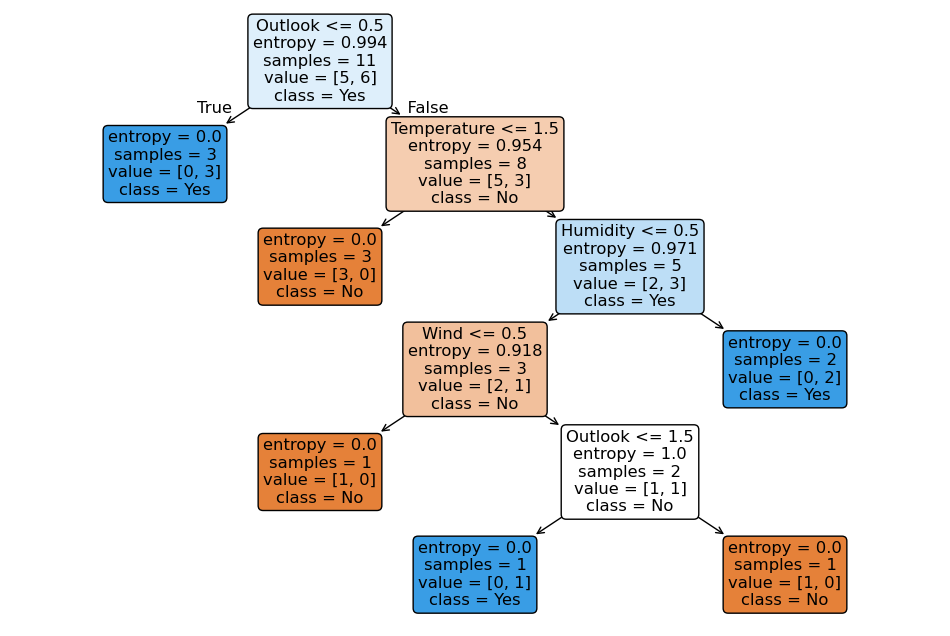

In [29]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(classifier2,filled=True , feature_names=x.columns, class_names=playing_encoder.categories_[0], rounded = True)